###Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market. 

Business Goal:
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Importing the Data 

In [544]:
import pandas as pd
import seaborn as snsexam
import numpy as np
from sklearn.metrics import r2_score

from sklearn import metrics

import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [545]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [546]:
Car_Price_Prediction=pd.read_csv('/content/drive/MyDrive/ML Learning csv/CarPrice_Assignment.csv')

Exploring data type and structure

In [547]:
Car_Price_Prediction.info()
Car_Price_Prediction.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [548]:
Car_Price_Prediction.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Correlation plot

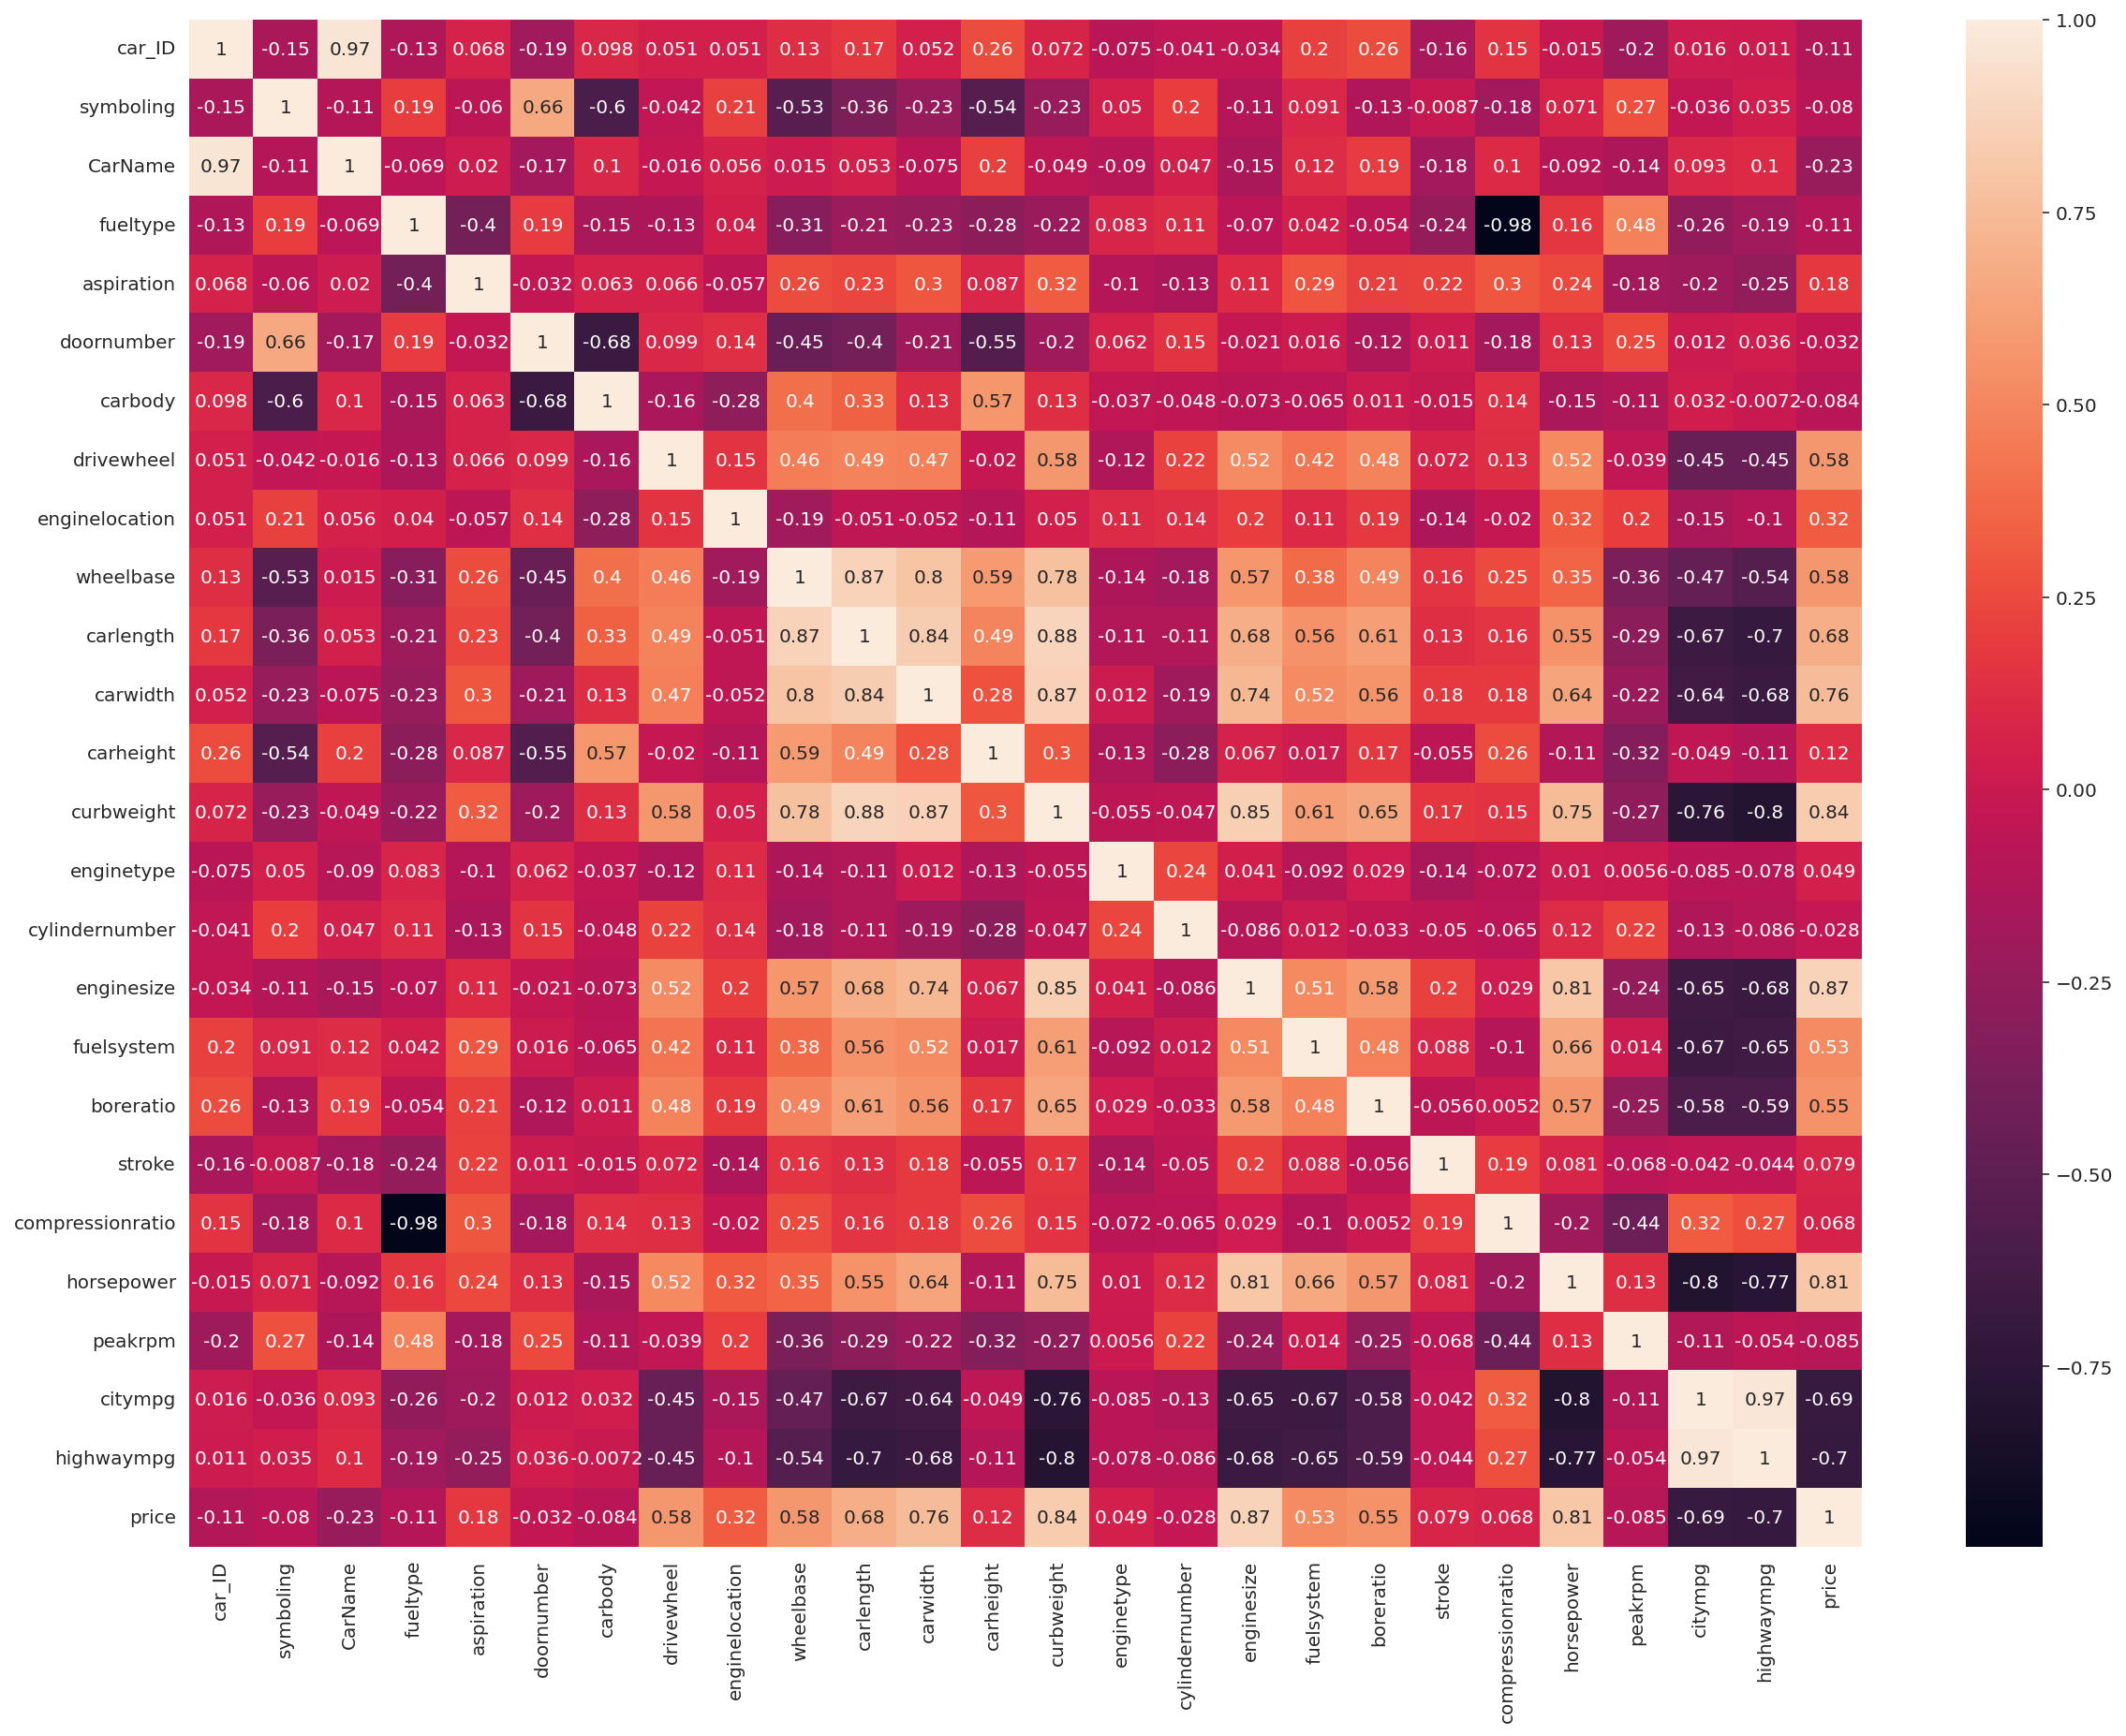

In [583]:
correlations = Car_Price_Prediction.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlations, annot = True);

In [551]:
df=Car_Price_Prediction
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


####Plot of each numerical attribute to see distribution

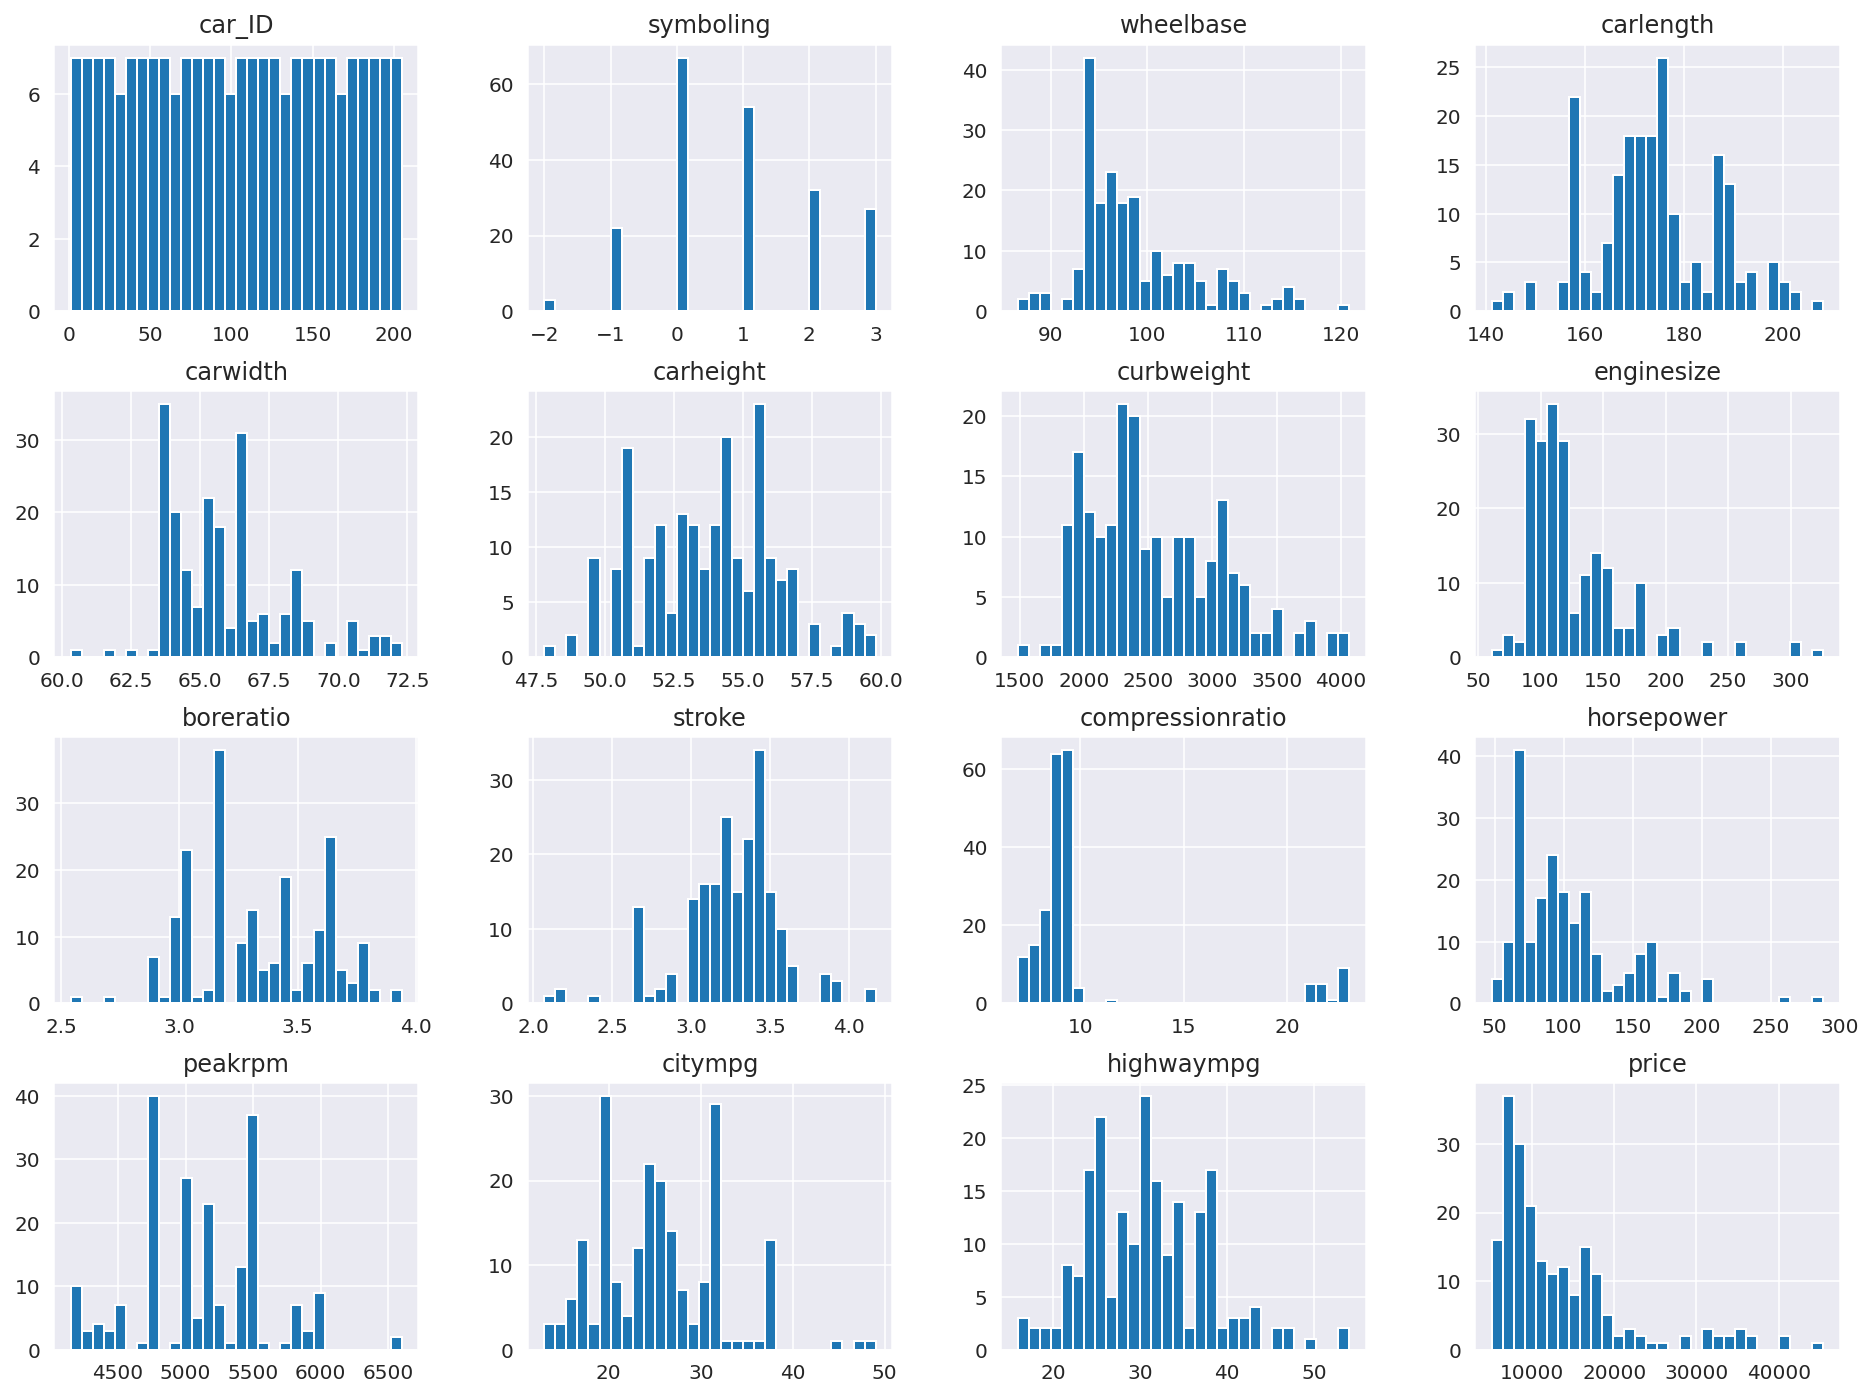

In [552]:
#plot a histogram for each numerical attribute
%matplotlib inline  
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(16,12))
plt.show()

#### Cleaning the Data

In [553]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
0,car_ID,0,0.0
1,symboling,0,0.0
24,highwaympg,0,0.0
23,citympg,0,0.0
22,peakrpm,0,0.0
21,horsepower,0,0.0
20,compressionratio,0,0.0
19,stroke,0,0.0
18,boreratio,0,0.0
17,fuelsystem,0,0.0


No missing values

####Use LabelEncoder to do the numeric transformation for objects

In [554]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns.values:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

##MODEL BUILDING

Train Test Split

In [555]:
# Create feature and target variable for problem
X_class= df.drop('price', axis=1)
y_class = df['price']

In [556]:
from sklearn.model_selection import train_test_split

In [557]:
x_train,x_test,y_train,y_test=train_test_split(X_class,y_class,train_size=0.8)

In [558]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.fit_transform(x_test)

In [559]:
x_train.shape

(164, 25)

## FEATURE IMPORTANCE MODEL

In [560]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt


 RandomForestRegressor

In [561]:
rf = RandomForestRegressor(n_estimators=100)
rf = rf.fit(rescaledX_train,y_train)

In [562]:
rf.feature_importances_

array([1.28816615e-02, 5.57619586e-04, 8.35805901e-03, 5.66764166e-04,
       1.04106500e-03, 2.45199320e-04, 1.97101958e-03, 1.17519099e-03,
       1.58170735e-04, 1.32021691e-02, 6.68945154e-03, 2.62339244e-02,
       4.21576111e-03, 1.88353152e-01, 5.08171078e-03, 7.42095251e-04,
       6.24440988e-01, 4.34490684e-03, 3.89597317e-03, 5.90387388e-03,
       5.36673760e-03, 3.82309994e-02, 5.90348435e-03, 5.72155161e-03,
       3.47184709e-02])

In [563]:
feature_scores = pd.Series(data=rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

enginesize          0.624441
curbweight          0.188353
horsepower          0.038231
highwaympg          0.034718
carwidth            0.026234
wheelbase           0.013202
car_ID              0.012882
CarName             0.008358
carlength           0.006689
stroke              0.005904
peakrpm             0.005903
citympg             0.005722
compressionratio    0.005367
enginetype          0.005082
fuelsystem          0.004345
carheight           0.004216
boreratio           0.003896
carbody             0.001971
drivewheel          0.001175
aspiration          0.001041
cylindernumber      0.000742
fueltype            0.000567
symboling           0.000558
doornumber          0.000245
enginelocation      0.000158
dtype: float64

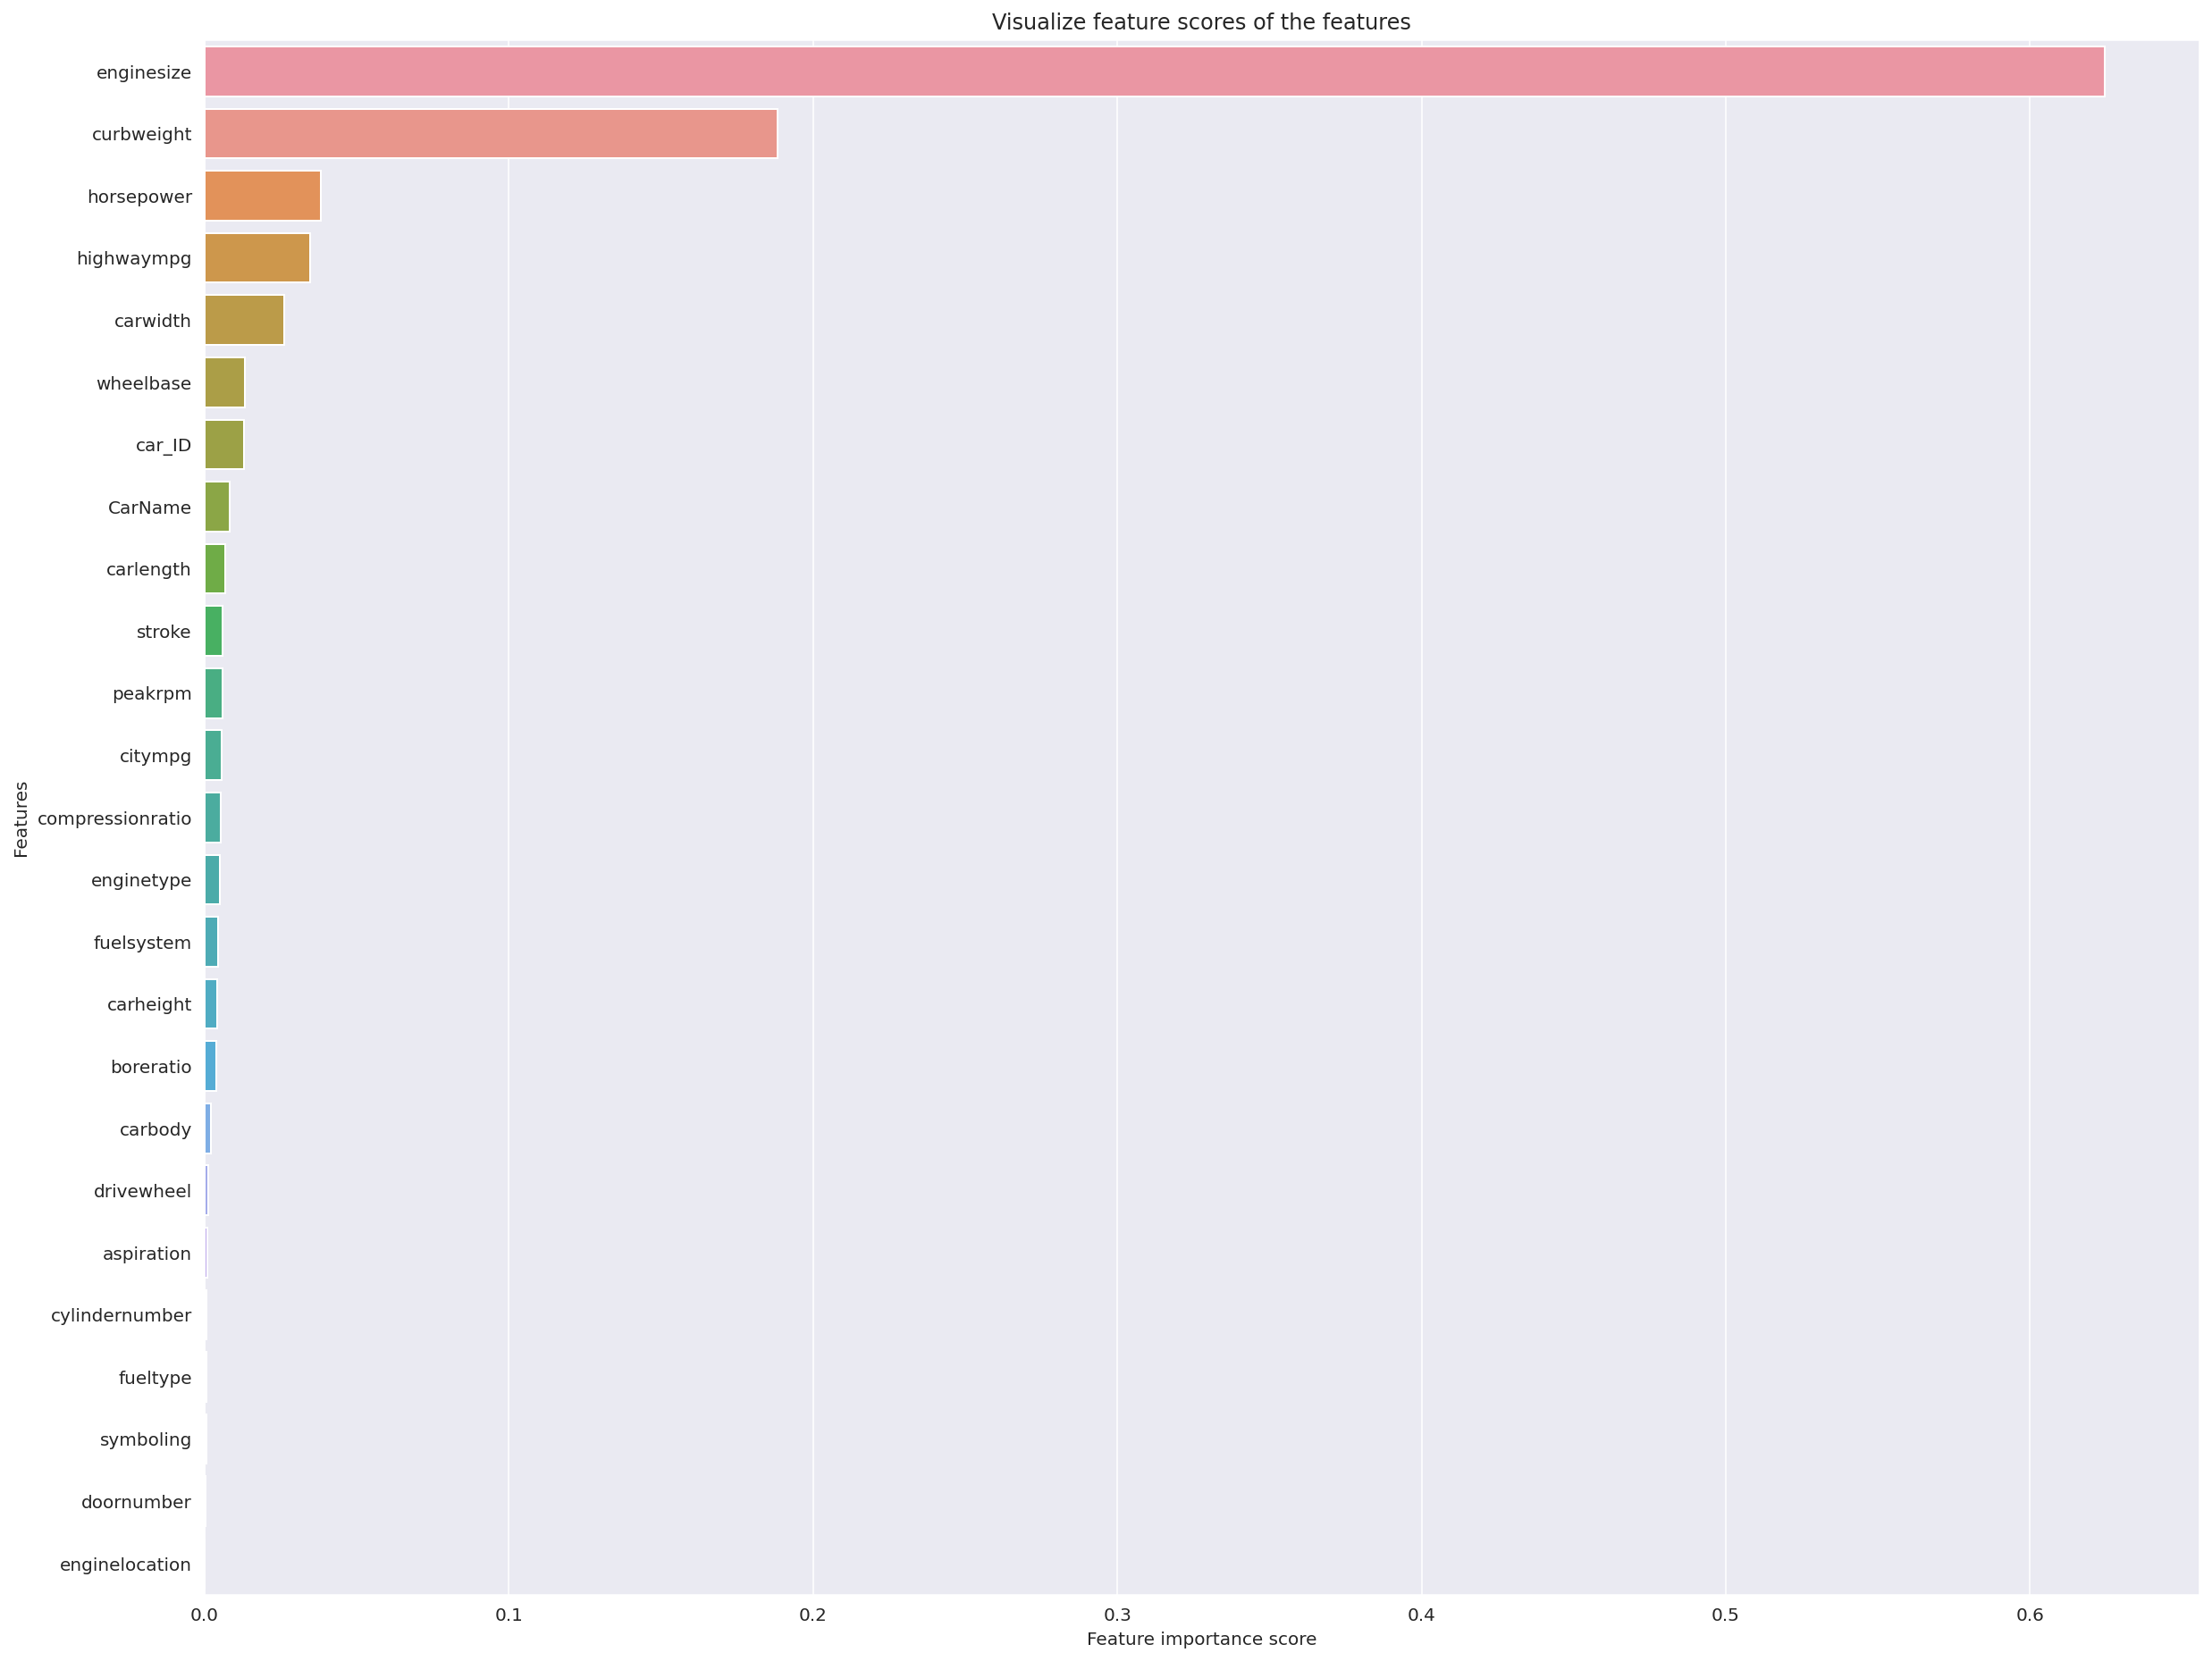

In [564]:
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=feature_scores, \
                 orient = 'h', order=feature_scores)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

###Interpretation of results

After running a random regressor it identifies the features below are the most import in determing price.

* enginesize          0.624441
* curbweight          0.188353
* horsepower          0.038231
* highwaympg          0.034718
* carwidth            0.026234
* wheelbase           0.013202
* car_ID              0.012882
* CarName             0.008358
* carlength           0.006689
* stroke              0.005904
* peakrpm             0.005903
* citympg             0.005722

To test the significance of these results we will use a regression model to validate if these results are true. We will only keep the features that have a t value of below our alpha of 5%


####Fit the data on test set

In [565]:
y_pred = rf.predict(rescaledX_test)

In [566]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2351.311747804878
Mean Squared Error: 16552825.63122739
Root Mean Squared Error: 4068.5163919084057
r2_score: 0.8098841225476502


### Linear Regression to test features significant in predicting price.

In [567]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [568]:
print(df)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)

     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         1          3        2         1           0           1        0   
1         2          3        3         1           0           1        0   
2         3          1        1         1           0           1        2   
3         4          2        4         1           0           0        3   
4         5          2        5         1           0           0        3   
..      ...        ...      ...       ...         ...         ...      ...   
200     201         -1      139         1           0           0        3   
201     202         -1      138         1           1           0        3   
202     203         -1      140         1           0           0        3   
203     204         -1      142         0           1           0        3   
204     205         -1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  ...  enginesize  fu

In [569]:
df_train = df.sample(frac=0.75,random_state=200)

In [570]:
df_test= df.drop(df_train.index)

In [571]:
df_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
69,70,0,16,0,1,1,1,2,0,106.7,...,183,3,3.58,3.64,21.50,123,4350,22,25,28176.0
132,133,3,101,1,0,1,2,1,0,99.1,...,121,5,3.54,3.07,9.31,110,5250,21,28,11850.0
188,189,2,132,1,0,0,3,1,0,97.3,...,109,5,3.19,3.40,10.00,100,5500,26,32,9995.0
192,193,0,135,0,1,0,3,1,0,100.4,...,97,3,3.01,3.40,23.00,68,4500,33,38,13845.0
174,175,-1,113,0,1,0,3,1,0,102.4,...,110,3,3.27,3.35,22.50,73,4500,30,33,10698.0


In [572]:
df_test.shape

(51, 26)

In [573]:
df_train.shape

(154, 26)

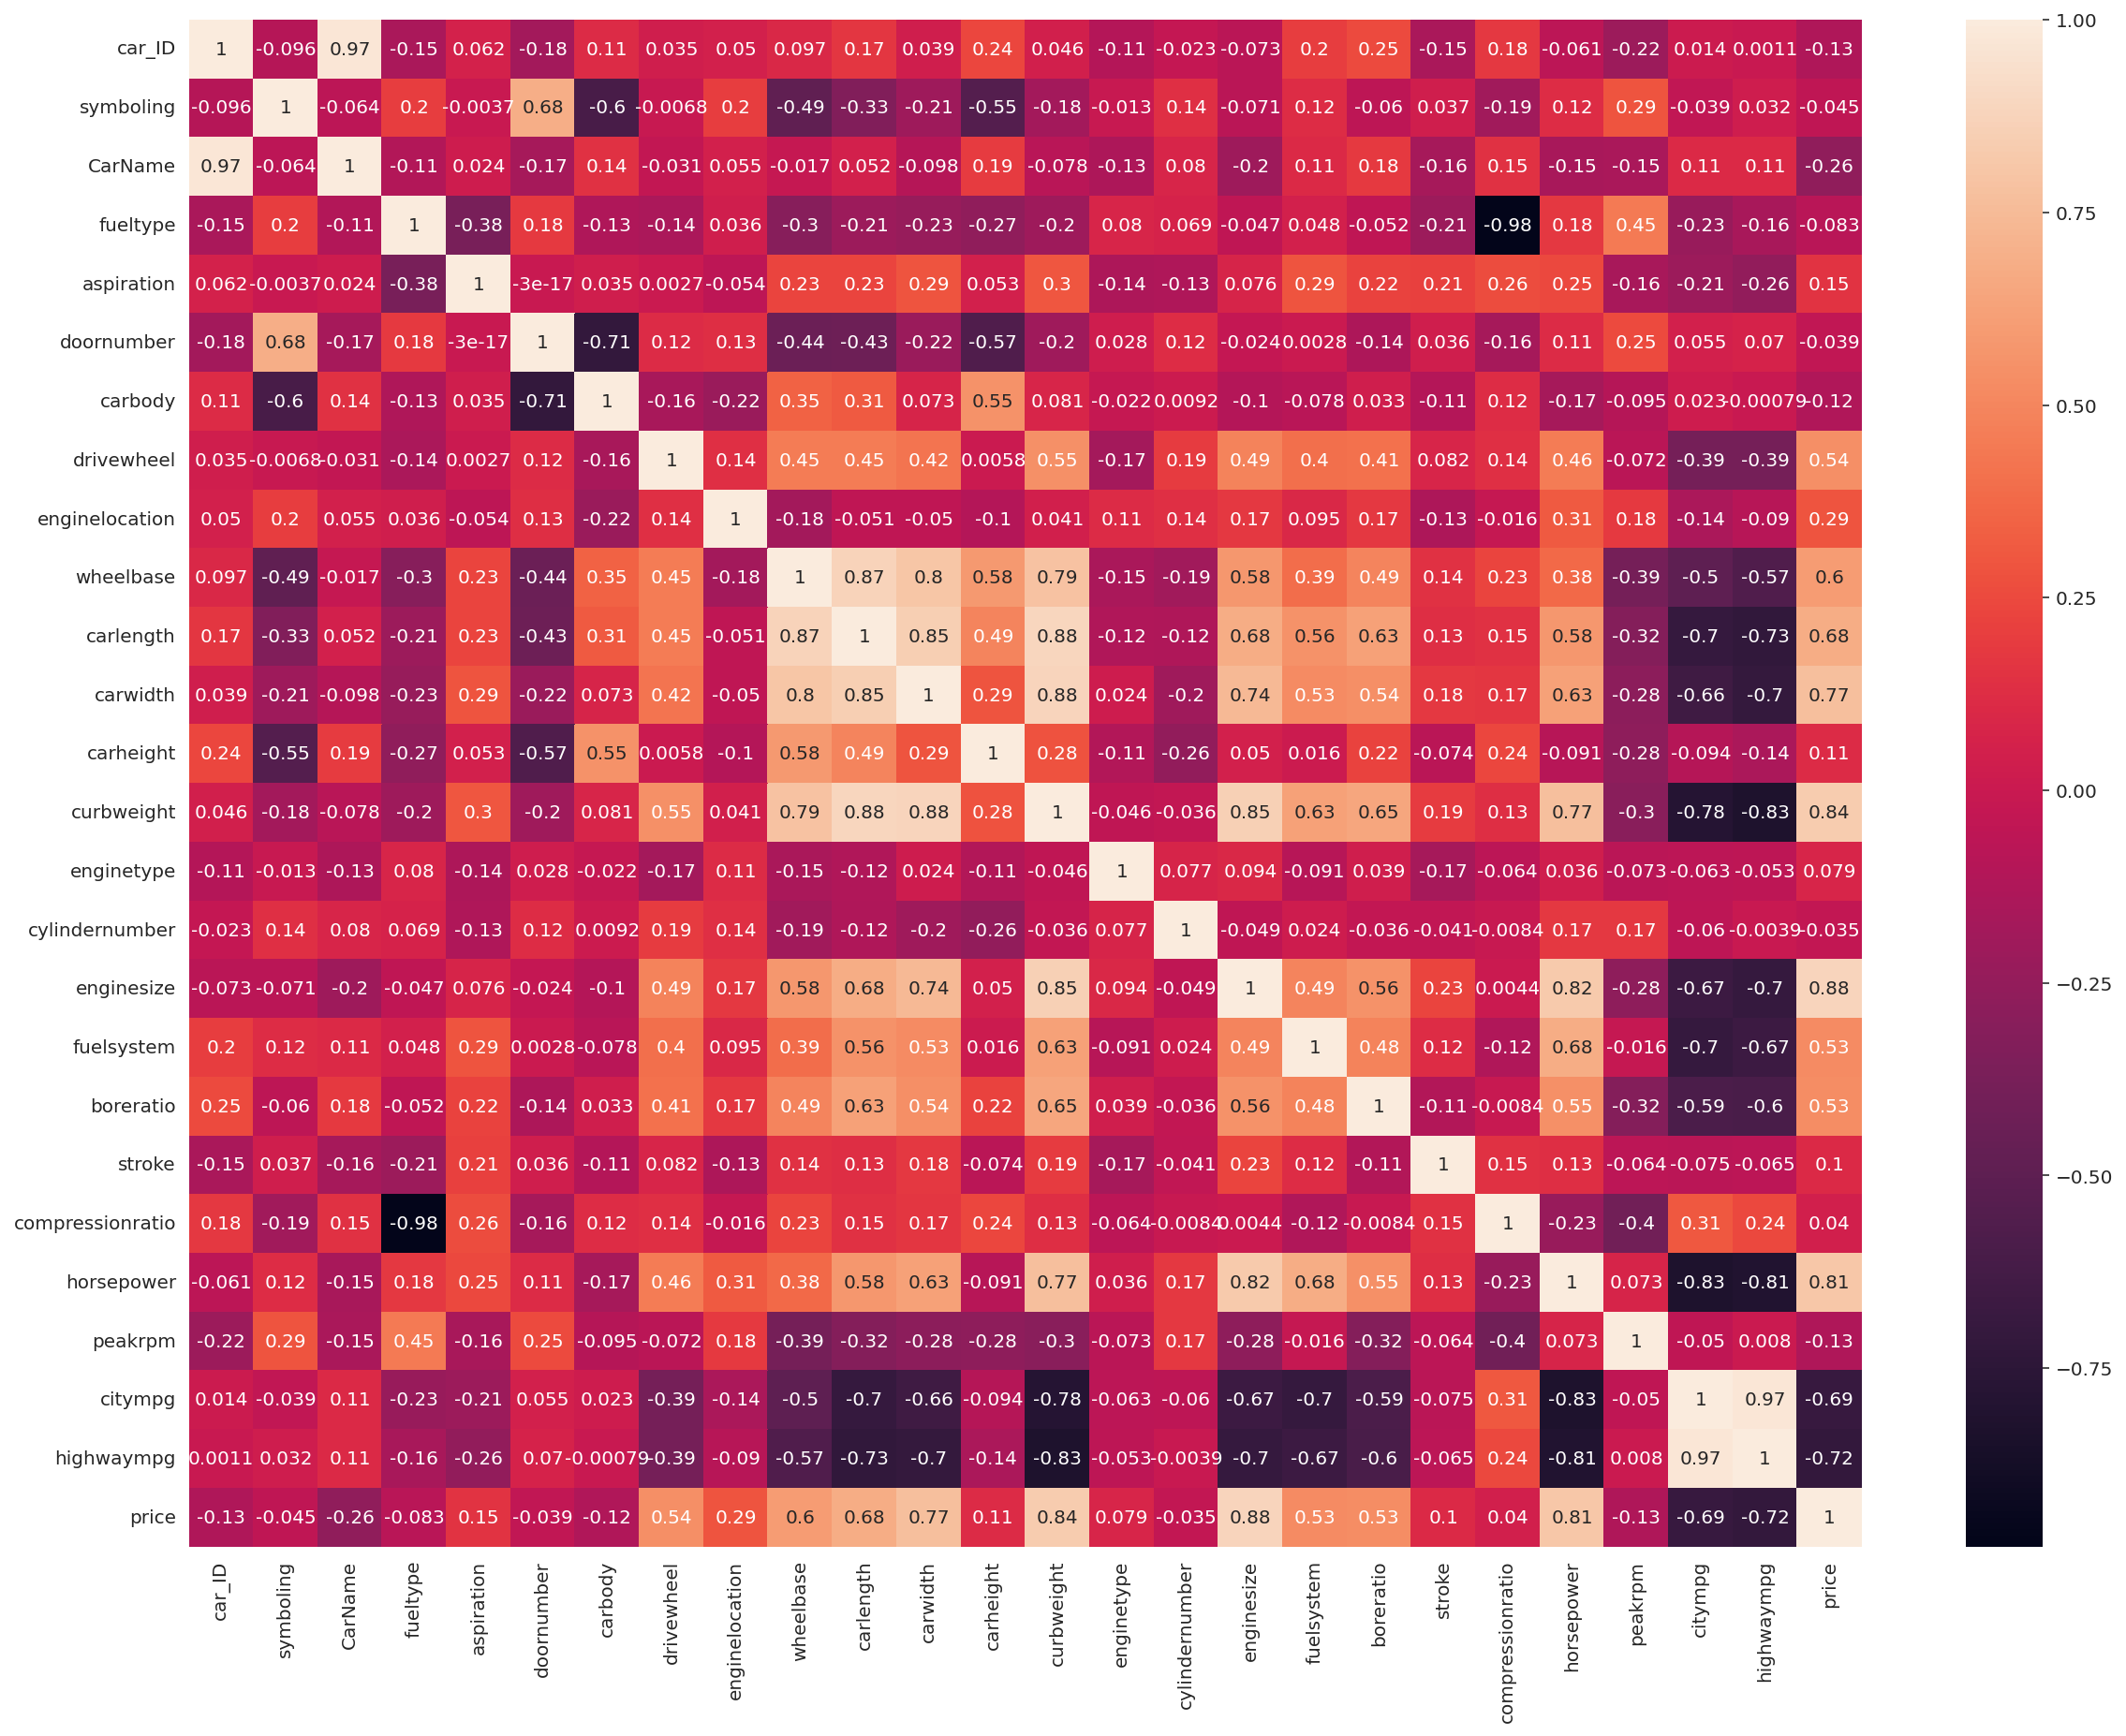

In [574]:
correlations = df_train.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlations, annot = True);

Regression model

In [587]:
lrmodel = smf.ols("price ~ enginesize + CarName  + car_ID  + carwidth  + stroke  + peakrpm  + aspiration  + drivewheel + enginelocation", data=df_train).fit()

###Dropped features(insignificant at 5% alpha threshold)

Highwaympg,cylindernumber, car_ID, compressionratio, carlength, wheelbase, carheight, boreratio, enginetype, symboling, fuelsystem, fueltype,carbody,doornumber,curbweight

In [588]:
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     129.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.65e-64
Time:                        01:43:53   Log-Likelihood:                -1428.6
No. Observations:                 154   AIC:                             2877.
Df Residuals:                     144   BIC:                             2907.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.821e+04   1.16e+04     -5.

In [590]:
predictions = lrmodel.predict(df_test) 

In [591]:
Y_pred = predictions
Y_pred= Y_pred.to_frame()

In [592]:
Y_pred.rename( columns={0:'Prediction'}, inplace=True )

In [593]:
Y_pred

,Prediction
1,15518.358064
3,13242.680607
7,21249.299558
14,19072.129433
16,26110.025093
20,7813.068850
23,9139.359993
26,8016.425898
35,8238.355491
42,11165.437829


In [594]:
testrsquared = df_test['price'].corr(Y_pred['Prediction'])**2
testrsquared 

0.8656789911079976

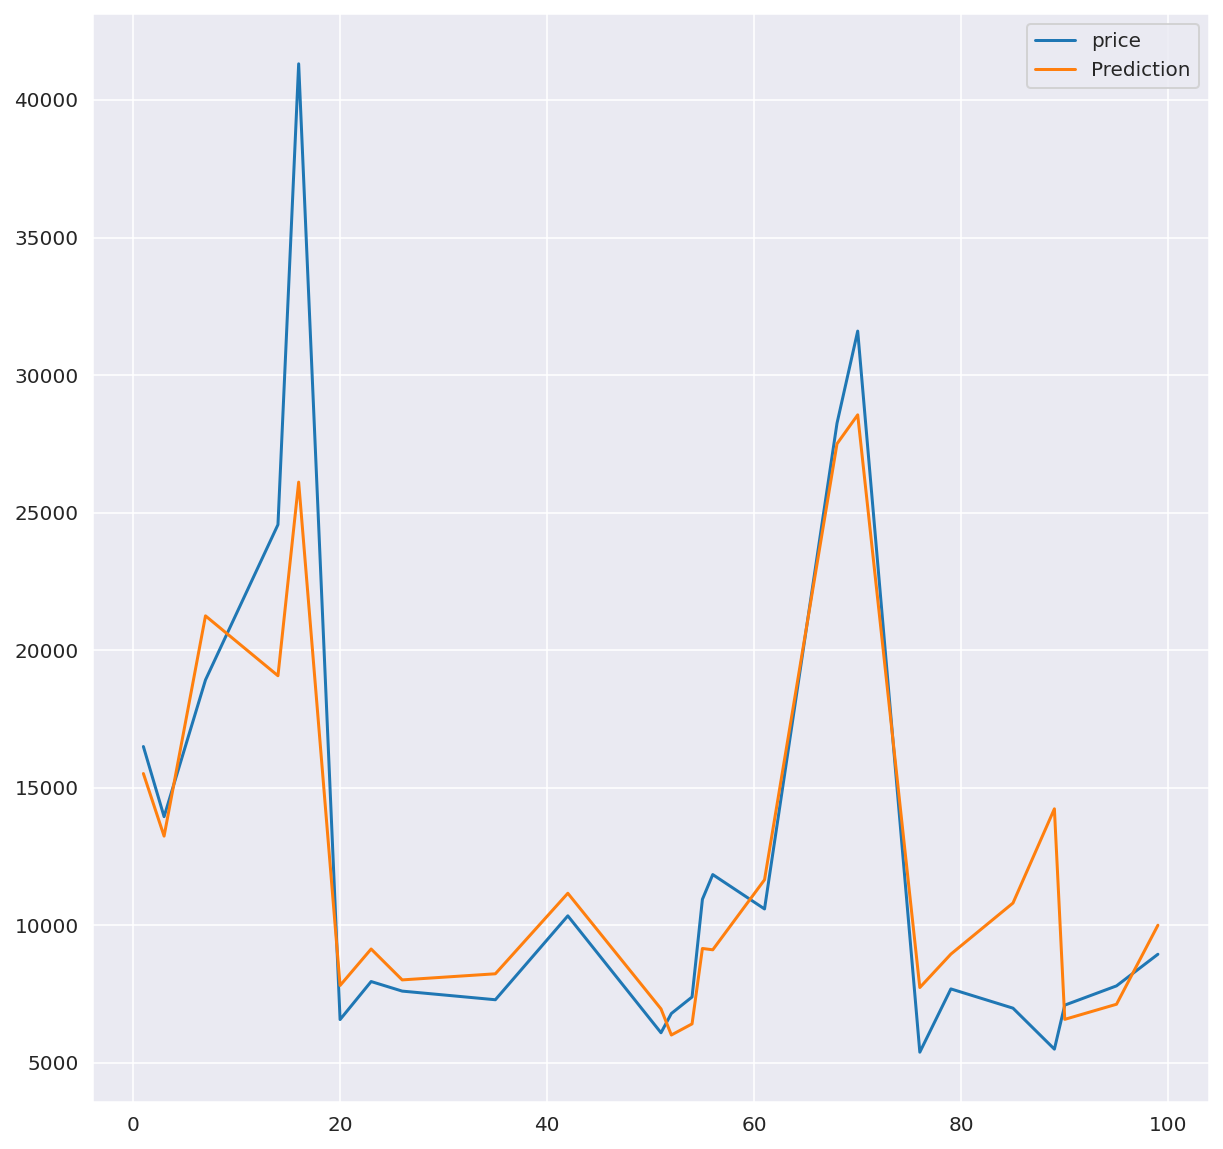

In [595]:
plt.figure(figsize=(10,10))
df_test["price"][:25,].plot.line()
Y_pred["Prediction"][:25,].plot.line()
plt.legend()
plt.show()

Conclusion

* Based on the business problem, we are required to model the price of cars with 
the available independent features.
* For our final model the features good at determining price for the decision makers are shown below.
All these features are significant at the alpha threshold of 5%

* Final features: Engine size,Car Name,Car ID,Car Width,Stroke,Peak rpm,Aspiration, Drivewheel,Engine location. These features also enable management to understand the pricing dynamics of a new market